# 1. 선형과 비선형

- 선형 함수 : $ \text{weight} \times x + \text{bias} $
- 비선형 함수 : $ \frac{1}{1 + e^{-x}} $

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import _default_

In [286]:
# 선형 함수 정의
def linear_model(x, weight=2, bias=3):
    return weight * x + bias

# 비선형 함수 정의 sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

inputs = np.linspace(-10, 10, 100)

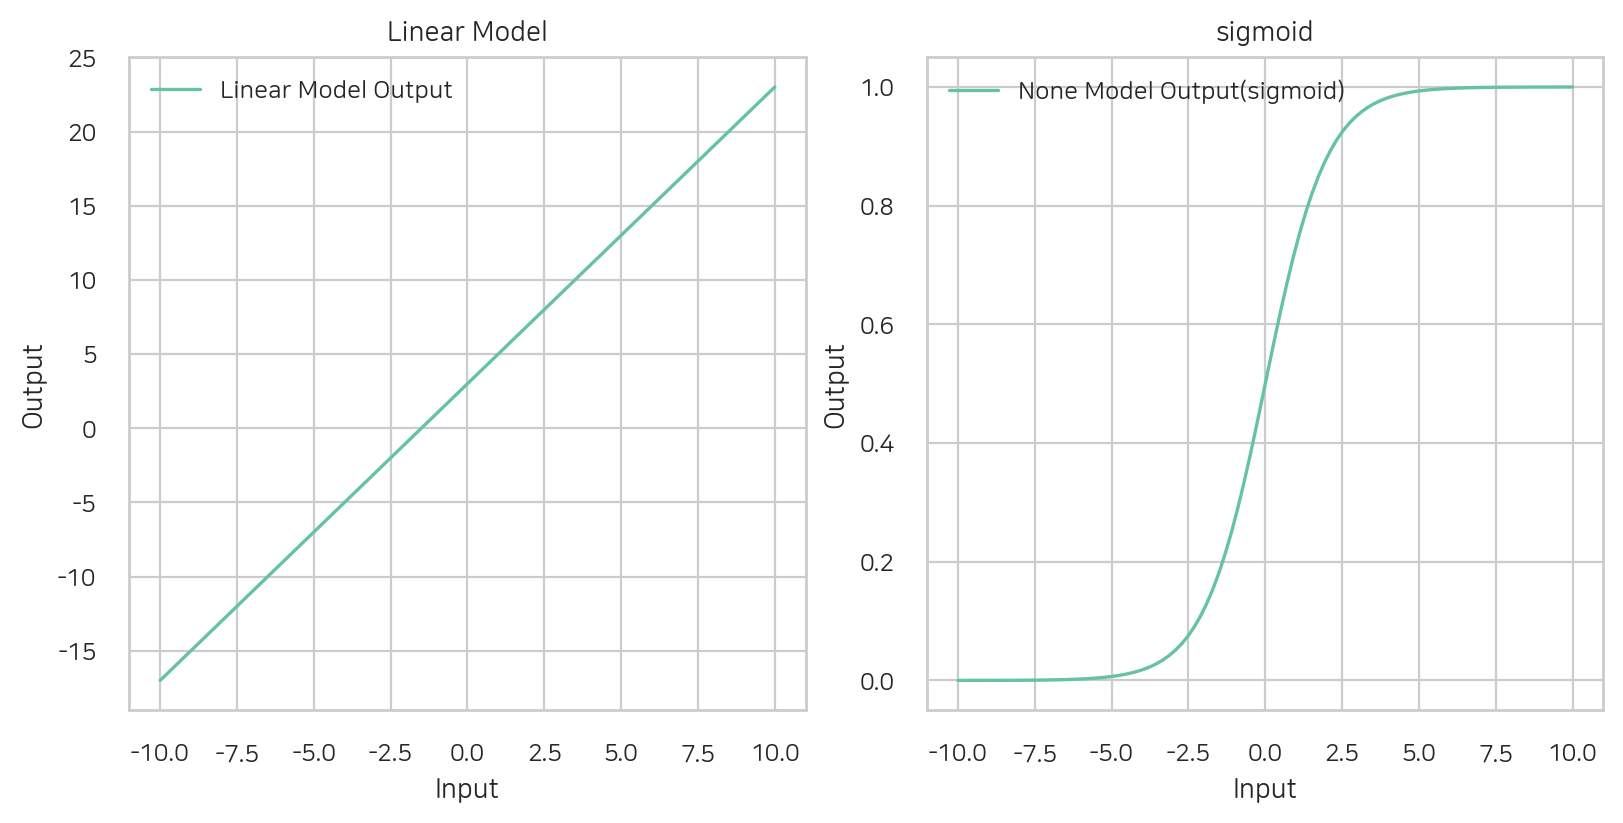

In [287]:

# 시각화
fig, ax = plt.subplots(1,2,figsize=(8, 4))

# Linear plot
ax[0].plot(inputs, linear_model(inputs), label='Linear Model Output')
ax[0].set_title('Linear Model')

# None Linear plot
ax[1].plot(inputs, sigmoid(inputs), label='None Model Output(sigmoid)')
ax[1].set_title('sigmoid')

for i in range(0,2):
    ax[i].set_xlabel('Input')
    ax[i].set_ylabel('Output')
    ax[i].legend();

# 2. 도함수 계산

$$f(x) = x^2 - 4x + 5 $$
$$f'(x) = 2x - 4 $$

In [288]:
x = np.linspace(0, 5, 100)
f = lambda x: x**2 - 4*x + 5
grad_f = lambda x: 2*x - 4

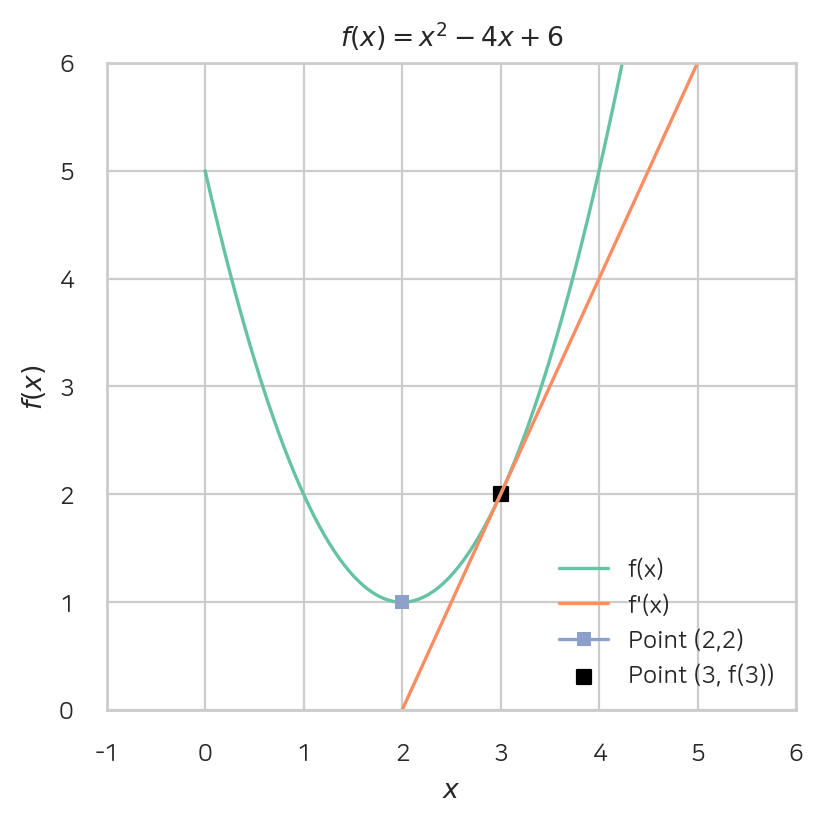

In [289]:
# Plot
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, f(x), label='f(x)')
ax.plot(x, grad_f(x), label="f'(x)")
ax.plot(2, 1, marker="s", label="Point (2,2)")
ax.scatter(3, f(3), marker="s", color="k", label="Point (3, f(3))")
ax.set(xlim=(-1, 6), ylim=(0, 6), xlabel=R'$x$', ylabel=R'$f(x)$', title="$f(x) = x^2 - 4x + 6$")
ax.legend()
plt.show()

In [290]:
def gradient_descent(f, grad_f, x_0, learning_rate, max_iter):
    paths = []
    for i in range(max_iter):
        x_1 = x_0 - learning_rate * grad_f(x_0)
        paths.append(x_1)
        x_0 = x_1
    return np.array(paths)

In [291]:
paths = gradient_descent(f, grad_f, 4, learning_rate=0.01, max_iter=10)

In [292]:
x = np.linspace(-1, 7, 100)
f = lambda x: x*np.sin(x)
grad_f = lambda x: np.sin(x) + x * np.cos(x)
## 초깃값의 민감성
paths_s = gradient_descent(f, grad_f, 2.5, learning_rate=0.25, max_iter=5)
paths_o = gradient_descent(f, grad_f, 1.5, learning_rate=0.25, max_iter=5)


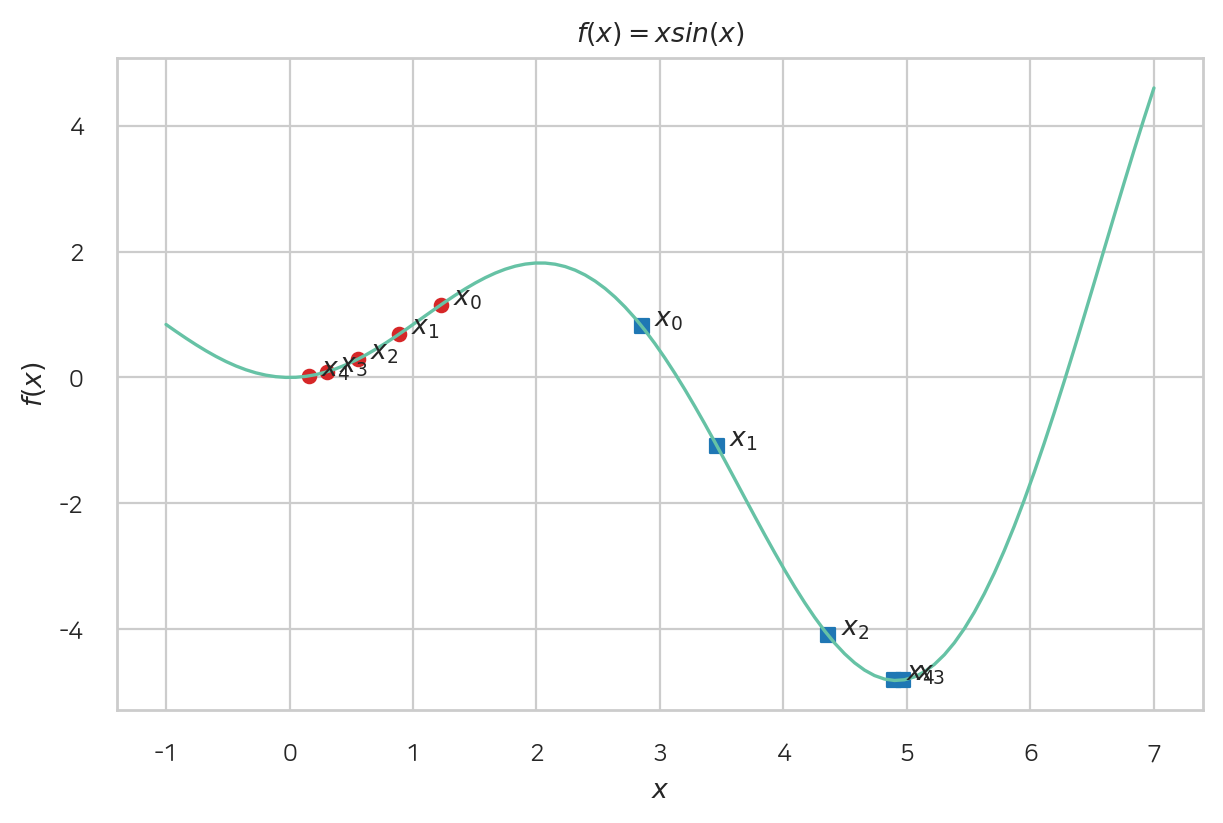

In [293]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f(x))
ax.scatter(paths_s, f(paths_s), marker = "s", color = "tab:blue")
ax.scatter(paths_o, f(paths_o), marker = "o", color = "tab:red")
for k, point in enumerate(paths_s):
    ax.text(point+0.1, f(point), f'$x_{k}$')
for k, point in enumerate(paths_o):
    ax.text(point+0.1, f(point), f'$x_{k}$')
    ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = xsin(x)$");

In [294]:
!pip install plotly
!pip install nbformat

In [295]:
# 3 차원 plot drawing
import plotly.graph_objs as go

In [296]:
x = np.outer(np.linspace(-4, 5, 30), np.ones(30))
y = x.copy().T # transpose
z = 5*(x*np.cos(x)) + (2*y-1)**2
surface = go.Surface(x = x, y = y, z = z)
data = [surface]
layout = go.Layout(title = '3D Surface Plot')
fig = go.Figure(data = data, layout=layout)
fig.show()

# 3. Vectorization
- Vector : 크기와 방향을 가진 물리량 <br>
    하나의 벡터는 위상공간 안에서 n차원의 공간적 위치를 가짐 (차원은 원소의 수) <br>
    공간상 위치 : 고유한 특성 반영
- 1d array : 여러개의 숫자를 한줄로 배열


### 3.1 유사도 : 벡터 공간의 거리로 표현 가능 <br>

- $(x_1,y_1),(x_2,y_2) $ 사이의 거리
    - 맨하튼 거리 L1
        $$ d = |x_1-x_2| + |y_1-y_2| $$
    - 유클리디언 거리 L2
        $$ d = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} $$
    - 코사인 거리 :
        $$ 1 - cos \theta $$
        > 여기서 <br>
        > $ cos \theta$ = 코사인 유사도 = $ \frac{a \cdot b}{|x||b|} $

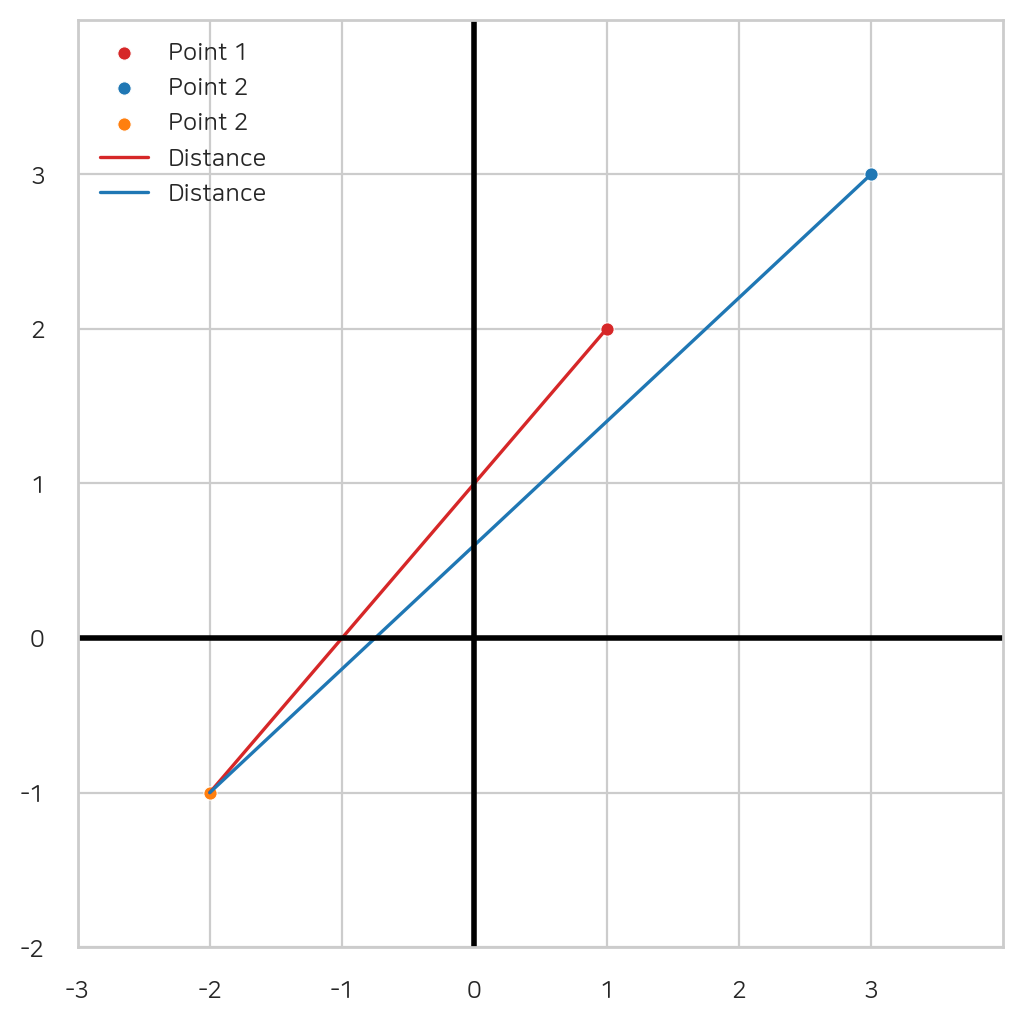

In [297]:
fig, ax = plt.subplots(figsize=(5,5))
v1 = np.array([1,2])
v2 = np.array([3,3])
c1 = np.array([-2,-1])
sns.scatterplot(x=[v1[0]], y=[v1[1]],c="tab:red", label='Point 1', ax = ax)
sns.scatterplot(x=[v2[0]], y=[v2[1]],c="tab:blue", label='Point 2', ax = ax)
sns.scatterplot(x=[c1[0]], y=[c1[1]],c="tab:orange", label='Point 2', ax = ax)

sns.lineplot(x=[c1[0],v1[0]], y=[c1[1],v1[1]], c="tab:red" ,label='Distance', ax = ax, )
sns.lineplot(x=[c1[0],v2[0]], y=[c1[1],v2[1]], c="tab:blue" ,label='Distance', ax = ax, )

ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax.set_xlim((-3,4))
ax.set_ylim((-2,4))

ax.grid(True)
ax.set_xticks(range(-3,4,1))
ax.set_yticks(range(-2,4,1));

### 3.2 Vectorizer 라이브러리

In [298]:
# !pip install nltk

In [299]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based Document-Term Matrix
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based Document-Term Matrix

In [300]:
TEXT = ['안녕 하세요 저는 진형 입니다.',
        '안녕 반가워요 저는 학생 이에요.',
        '그렇군요 저는 대학생 이에요.',
        '반가워요 학생 및 대학생 분들'
]

TXT = "안녕 하세요 저는 진형 이에요, 그리고 반가워요"

### 3.3 CounterVectorizer

각 문서에서 고유한 단어(토큰)를 추출, 각 단어의 문서 내 출현 빈도를 계산, 각 요소는 특정 문서에서 특정 단어가 얼마나 자주 등장하는지를 나타낸다.

In [301]:
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,2))
tf_features = tf_vectorizer.fit_transform(TEXT)
features = np.array(tf_features.todense())

In [302]:
import nltk
from nltk import ngrams

def getNgramWord(N,txt):
    txt = txt.split()
    ngrams = [txt[i:i+N] for i in range(len(txt)-N+1)]
    return ngrams

print("1-gram : " + str(getNgramWord(1, TXT))) # unigram
print("2-gram : " + str(getNgramWord(2, TXT))) # bigram
print("3-gram : " + str(getNgramWord(3, TXT))) # trigram

feature_names = tf_vectorizer.get_feature_names_out()
df = pd.DataFrame(data=features, columns=feature_names)
display(df)

1-gram : [['안녕'], ['하세요'], ['저는'], ['진형'], ['이에요,'], ['그리고'], ['반가워요']]
2-gram : [['안녕', '하세요'], ['하세요', '저는'], ['저는', '진형'], ['진형', '이에요,'], ['이에요,', '그리고'], ['그리고', '반가워요']]
3-gram : [['안녕', '하세요', '저는'], ['하세요', '저는', '진형'], ['저는', '진형', '이에요,'], ['진형', '이에요,', '그리고'], ['이에요,', '그리고', '반가워요']]


,그렇군요,그렇군요 저는,대학생,대학생 분들,대학생 이에요,반가워요,반가워요 저는,반가워요 학생,분들,안녕,...,저는 대학생,저는 진형,저는 학생,진형,진형 입니다,하세요,하세요 저는,학생,학생 대학생,학생 이에요
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,1,1,0,0,0
1,0,0,0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0



### 3.4 TfidfVectorizer
TF-IDF(Term Frequency-Inverse Document Frequency) 점수를 사용하여 텍스트를 벡터로 변환(단어의 중요도).
- **Term Frequency (TF)**: 특정 문서에서 단어의 출현 빈도.
- **Inverse Document Frequency (IDF)**: 전체 문서에서 해당 단어가 얼마나 드물게 나타나는지를 나타내는 값. 자주 등장하는 단어는 낮은 가중치.

즉 각 단어에 대해 TF-IDF 점수를 계산하여, 각 문서의 벡터 표현을 제공하여 문서 간의 유사성을 측정하거나, 정보 검색 및 분류 작업에서 더 유용하게 활용.

In [303]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

tfidf_features = np.array(tfidf_features.todense())

In [304]:
df = pd.DataFrame(data=tfidf_features,
                  columns=tfidf_vectorizer.get_feature_names_out())
display(df)

,그렇군요,대학생,반가워요,분들,안녕,이에요,입니다,저는,진형,하세요,학생
0,0.000000,0.000000,0.000000,0.000000,0.392784,0.000000,0.498197,0.317993,0.498197,0.498197,0.000000
1,0.000000,0.000000,0.463468,0.000000,0.463468,0.463468,0.000000,0.375218,0.000000,0.000000,0.463468
2,0.614226,0.484263,0.000000,0.000000,0.000000,0.484263,0.000000,0.392053,0.000000,0.000000,0.000000
3,0.000000,0.465809,0.465809,0.590819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465809


# 4. Tokenization
- 토큰화 : 문장을 단어별로 나눔
- 수치화 : 토큰을 수치화 하는 과정
    - one-hot encoding : sparce 한 방법
    - 단어 embedding : 각 단어의 시퀀스화, 번호를 매기고 벡터화 하여 의미 관계 학습
    
    > <br>
    > 과정 : <br>
    > 토큰화 → 불용어 발라내기 → 벡터화 <br>
    > <br>

In [306]:
# 단어와 임베딩 매핑
word_embeddings = {
    "고양이": [0.1, 0.3, 0.5],
    "강아지": [0.2, 0.4, 0.6],
}

# 특정 단어의 임베딩 출력
print("고양이의 임베딩:", word_embeddings["고양이"])

고양이의 임베딩: [0.1, 0.3, 0.5]
